In [1]:
#全部行都能输出
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
plt.style.use('seaborn')

In [3]:
plt.rcParams['font.sans-serif']=['Simhei']  #显示中文,解决图中无法显示中文的问题
plt.rcParams['axes.unicode_minus']=False    #设置显示中文后,负号显示受影响。解决坐标轴上乱码问题 

# 导入 珍爱网3.csv

In [4]:
df = pd.read_csv(r"C:\Users\EDZ\Desktop\案列\珍爱网各城市小姐姐分析\code\珍爱网3.csv")
df

,名称,城市,区域,年龄,民族,籍贯,星座,学历,婚姻状况,身高,...,收入,是否吸烟,是否喝酒,住房情况,车辆情况,子女情况,年龄要求,身高要求,收入要求,择偶条件
0,玉水福兰,北京,朝阳区,33岁,汉族,吉林通化,魔羯座(12.22-01.19),中专,离异,165cm,...,3000元以下,不吸烟,不喝酒,租房,未买车,有孩子且住在一起,33-40岁,175-195cm,不明,33-40岁|175-195cm|不要吸烟
1,找爱的玫瑰,北京,海淀区,47岁,汉族,河北张家口,魔羯座(12.22-01.19),高中及以下,离异,158cm,...,8001-12000元,不吸烟,不喝酒,和家人同住,已买车,有孩子但不在身边,45-54岁,170-188cm,1.2万以上,45-54岁|170-188cm|月薪:1.2万以上|大学本科|不要吸烟|是否想要孩子:以后...
2,芯儿,北京,朝阳区,36岁,汉族,河北保定,天蝎座(10.23-11.21),大学本科,未婚,160cm,...,5001-8000元,不吸烟,稍微喝一点酒,租房,未买车,没有小孩,31-45岁,不明,8千以上,31-45岁|工作地:北京朝阳区|月薪:8千以上|未婚
3,沁心夜雨,北京,朝阳区,49岁,汉族,河北保定,魔羯座(12.22-01.19),高中及以下,离异,168cm,...,5001-8000元,不吸烟,不喝酒,已购房,未买车,有孩子且住在一起,46-53岁,170-180cm,8千以上,46-53岁|170-180cm|工作地:北京朝阳区|月薪:8千以上|离异|体型:运动员型|...
4,冰心,北京,石景山区,48岁,汉族,黑龙江牡丹江,射手座(11.22-12.21),高中及以下,离异,160cm,...,3001-5000元,不吸烟,不喝酒,和家人同住,未买车,有孩子但不在身边,39-54岁,不明,5千以上,39-54岁|月薪:5千以上
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4365,Miya,珠海,香洲区,35岁,汉族,重庆,魔羯座(12.22-01.19),高中及以下,离异,156cm,...,12001-20000元,稍微抽一点烟,稍微喝一点酒,租房,未买车,有孩子但不在身边,40-47岁,170-178cm,2万以上,40-47岁|170-178cm|工作地:广东珠海|月薪:2万以上|体型:一般|不要喝酒|有...
4366,薰薰,珠海,香洲区,36岁,汉族,不明,魔羯座(12.22-01.19),高中及以下,离异,166cm,...,12001-20000元,不吸烟,不明,不明,不明,没有小孩,31-45岁,172-182cm,2万以上,31-45岁|172-182cm|月薪:2万以上
4367,淡然,珠海,香洲区,35岁,汉族,广东珠海,天秤座(09.23-10.22),中专,未婚,160cm,...,20001-50000元,不吸烟,社交场合会喝酒,已购房,已买车,不明,33-43岁,170-180cm,不明,33-43岁|170-180cm|工作地:广东珠海香洲区|未婚
4368,云宝贝,珠海,香洲区,28岁,汉族,广东梅州,天秤座(09.23-10.22),大学本科,离异,163cm,...,5001-8000元,不吸烟,稍微喝一点酒,住在单位宿舍,未买车,没有小孩,29-35岁,170-185cm,1.2万以上,29-35岁|170-185cm|工作地:广东珠海|月薪:1.2万以上|大学本科|不要喝酒|...


## 珍爱网女性年龄分布情况

In [5]:
df['年龄'] = df.年龄.map(lambda s: int(re.findall('\d+', s)[0]))

In [6]:
df.head(2)

,名称,城市,区域,年龄,民族,籍贯,星座,学历,婚姻状况,身高,...,收入,是否吸烟,是否喝酒,住房情况,车辆情况,子女情况,年龄要求,身高要求,收入要求,择偶条件
0,玉水福兰,北京,朝阳区,33,汉族,吉林通化,魔羯座(12.22-01.19),中专,离异,165cm,...,3000元以下,不吸烟,不喝酒,租房,未买车,有孩子且住在一起,33-40岁,175-195cm,不明,33-40岁|175-195cm|不要吸烟
1,找爱的玫瑰,北京,海淀区,47,汉族,河北张家口,魔羯座(12.22-01.19),高中及以下,离异,158cm,...,8001-12000元,不吸烟,不喝酒,和家人同住,已买车,有孩子但不在身边,45-54岁,170-188cm,1.2万以上,45-54岁|170-188cm|月薪:1.2万以上|大学本科|不要吸烟|是否想要孩子:以后...


### 全国女性平均年龄

In [7]:
df.年龄.mean()     # 平均年龄37.78岁

37.787185354691076

### 主要城市的女性平均年龄

In [8]:
gp = df.groupby('城市')
gp

In [9]:
a = gp['年龄'].mean().sort_values(ascending=False)
a

城市
大连     41.700000
沈阳     40.616667
郴州     40.200000
南京     39.739496
石家庄    39.375000
宁波     39.226891
宿州     38.891667
珠海     38.722689
上海     38.697479
南昌     38.691667
福州     38.508333
太原     38.428571
天津     38.341667
金华     38.333333
南宁     38.176471
北京     38.134454
厦门     38.025000
中山     37.875000
长沙     37.858333
青岛     37.450000
武汉     37.416667
温州     37.361345
合肥     37.333333
郑州     37.183333
济南     36.933333
西安     36.916667
佛山     36.708333
成都     36.700000
泉州     36.591667
深圳     36.566667
杭州     36.366667
惠州     36.283333
广州     36.183333
东莞     36.000000
昆明     35.950000
重庆     35.933054
Name: 年龄, dtype: float64

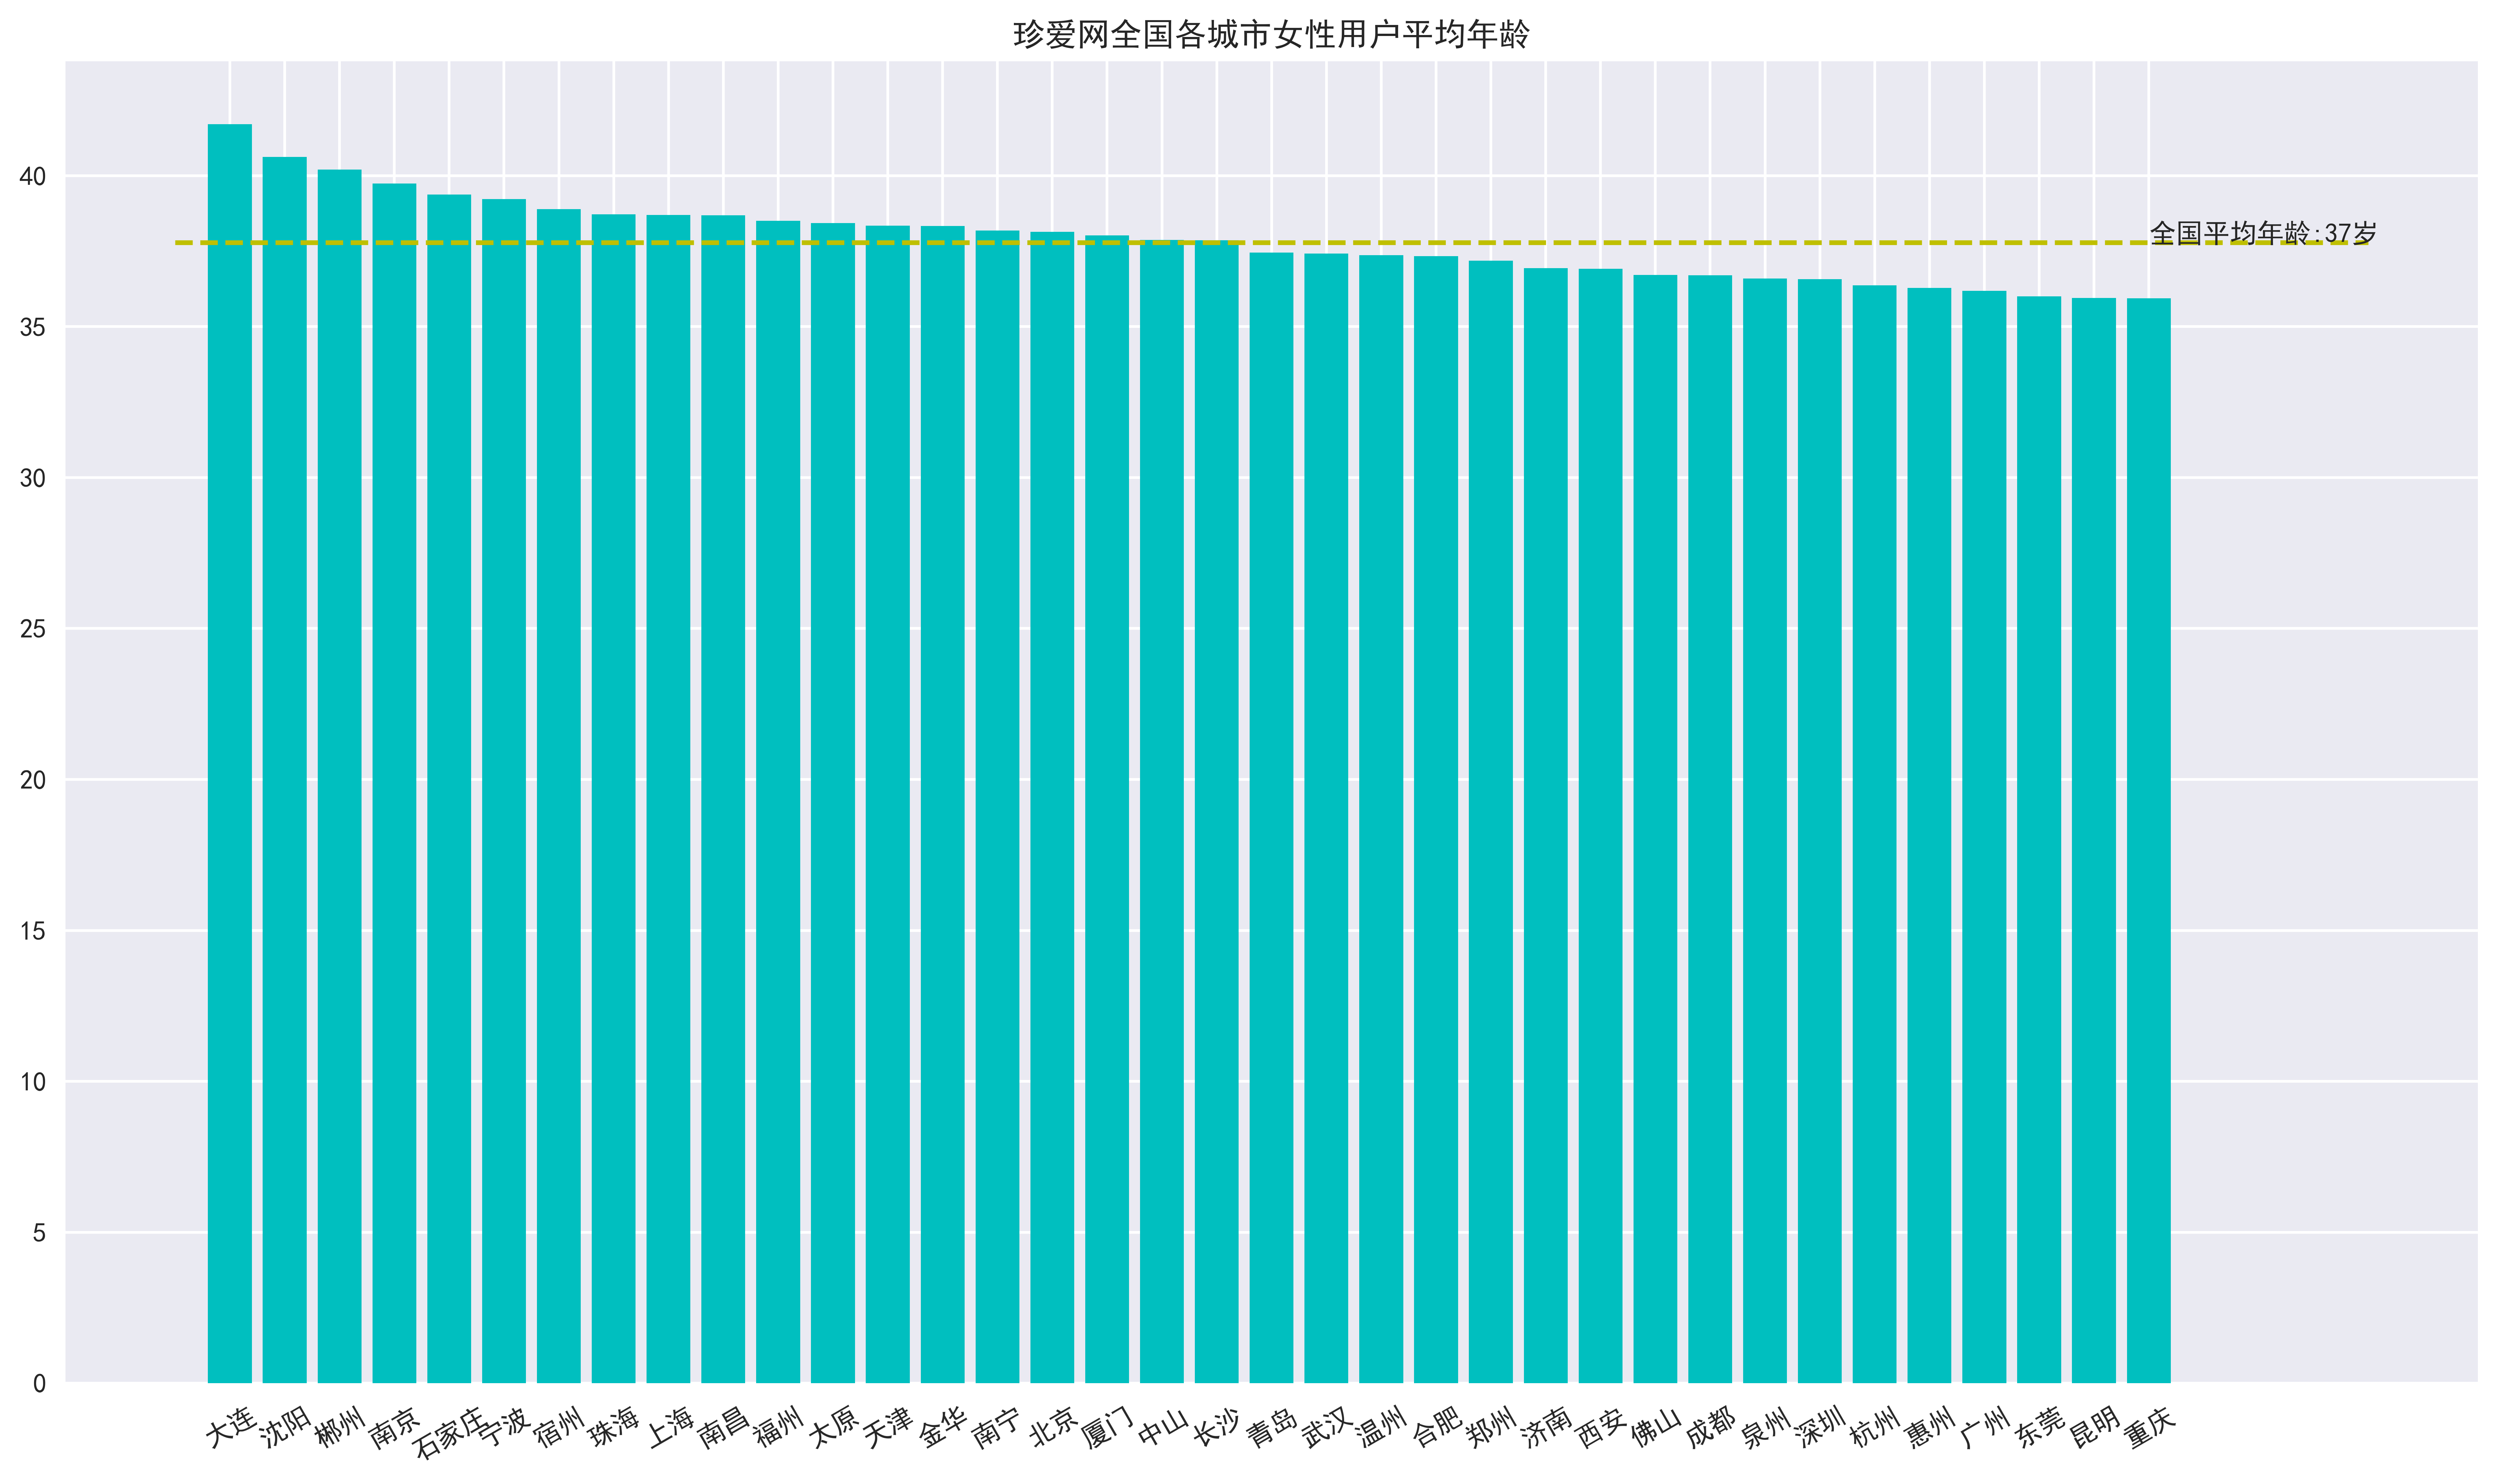

In [10]:
plt.figure(figsize=(16, 9), dpi=600)
plt.bar(a.index, a, color='c')
plt.plot(range(-1, 40), [df.年龄.mean() for i in range(-1, 40)], color='y', linestyle='--')
plt.xticks(rotation=30)
plt.text(35, df.年龄.mean(), '全国平均年龄:{}岁'.format(int(df.年龄.mean())))
plt.title('珍爱网全国各城市女性用户平均年龄');

### 查看北上广深的女性平均年龄

In [11]:
gp = df.groupby('城市')
gp

In [12]:
a = gp['年龄'].mean()
a = a.loc[['北京', '上海', '广州', '深圳']]
a = a.sort_values(ascending=False)
a = a.map(lambda x:round(x, 2))
a

城市
上海    38.70
北京    38.13
深圳    36.57
广州    36.18
Name: 年龄, dtype: float64

In [13]:
# 导入直方图的类
from pyecharts.charts import Bar

# 导入配置项类
from pyecharts import options as opts

# 导入背景主题类
from pyecharts.globals import ThemeType

In [14]:
# 实例化一个bar图对象
bar = Bar(init_opts=opts.InitOpts(theme=ThemeType.PURPLE_PASSION))
# 添加横轴的标签
bar.add_xaxis(list(a.index))
bar.add_yaxis(series_name = "珍爱网北上广深的女性用户平均年龄",  
              yaxis_data = a.values.tolist(), 
               category_gap = 100   # 调整柱子之间的间距
             )   
# bar.set_global_opts( #title_opts= opts.TitleOpts(title = '珍爱网北上广深的女性用户平均年龄')
                    
#                     xaxis_opts=opts.AxisOpts(axislabel_opts={'rotate':30}) )
#                                                # 使刻度旋转30度，解决横轴显示不完全的问题



bar.render_notebook()

## 珍爱网女性用户学历分布情况

### 珍爱网全国女性用户学历分布情况

In [15]:
a = df.学历.value_counts()
a

 高中及以下     1371
 大专        1145
 大学本科      1012
 中专         696
 硕士         130
 博士          16
Name: 学历, dtype: int64

In [16]:
# 导入饼图类
from pyecharts.charts import Pie
def pie(a):
    # 实例化饼图对象
    pie = Pie(init_opts=opts.InitOpts(theme=ThemeType.MACARONS))
    pie.add(series_name = "珍爱网全国各城市女性用户学历分布情况",
            data_pair = list(zip(a.index, a.values.tolist())))
    # 全局配置项

    pie.set_global_opts(title_opts= opts.TitleOpts(title = "珍爱网全国女性用户学历分布情况"),
                        # 使得图例垂直
                        legend_opts=opts.LegendOpts(orient="vertical", pos_top="15%", pos_left="2%"))

    # 系列配置项        
                         # 系列配置项下的标签配置项
    pie.set_series_opts(label_opts= opts.LabelOpts(is_show = True, 
                                                   # formatter="{a}{b}{c}{d}"对应显示
                                                   #{a}（系列名称），{b}（数据项名称），{c}（数值）, {d}（百分比）
                                                   formatter="{b}:{c} \n{d}%"
                                                  ), 
                        position='right')  
    return pie.render_notebook()

In [17]:
pie(a)

### 查看北山广深的 女性用户学历情况

In [18]:
# 导入饼图类
from pyecharts.charts import Pie
def pie(a, city):
    # 实例化饼图对象
    pie = Pie(init_opts=opts.InitOpts(theme=ThemeType.MACARONS))
    pie.add(series_name = "珍爱网{}女性用户学历分布情况".format(city),
            data_pair = list(zip(a.index, a.values.tolist())))
    # 全局配置项

    pie.set_global_opts(title_opts= opts.TitleOpts(title = "珍爱网{}女性用户学历分布情况".format(city)), 
                        # 使得图例垂直
                        legend_opts=opts.LegendOpts(orient="vertical", pos_top="15%", pos_left="2%"))

    # 系列配置项        
                         # 系列配置项下的标签配置项
    pie.set_series_opts(label_opts= opts.LabelOpts(is_show = True, 
                                                   # formatter="{a}{b}{c}{d}"对应显示
                                                   #{a}（系列名称），{b}（数据项名称），{c}（数值）, {d}（百分比）
                                                   formatter="{b}:{c} \n{d}%"
                                                  ), 
                        position='right')  
    return pie

In [19]:
def x(c):
    a = df[df.城市==c]
    a = a.学历.value_counts()
    y = pie(a, c)
    return y
    

In [20]:
北京 = x('北京')
上海 = x('上海')
广州 = x('广州')
深圳 = x('深圳')

In [21]:
北京.render_notebook()
上海.render_notebook()
广州.render_notebook()
深圳.render_notebook()

## 珍爱网女性用户收入分析

### 珍爱网全国女性用户收入分析

In [22]:
a = df.收入.value_counts()
a

 5001-8000元      1286
 3001-5000元      1173
 8001-12000元      712
 3000元以下          608
 12001-20000元     406
 20001-50000元     128
 50000元以上          57
Name: 收入, dtype: int64

In [23]:
# 导入饼图类
from pyecharts.charts import Pie
def pie(a):
    # 实例化饼图对象
    pie = Pie(init_opts=opts.InitOpts(theme=ThemeType.MACARONS))
    pie.add(series_name = "珍爱网全国女性用户收入分布情况",
            data_pair = list(zip(a.index, a.values.tolist())))
    # 全局配置项

    pie.set_global_opts(title_opts= opts.TitleOpts(title = "珍爱网全国女性用户收入分布情况"),
                        # 使得图例垂直
                        legend_opts=opts.LegendOpts(orient="vertical", pos_top="15%", pos_left="2%"))

    # 系列配置项        
                         # 系列配置项下的标签配置项
    pie.set_series_opts(label_opts= opts.LabelOpts(is_show = True, 
                                                   # formatter="{a}{b}{c}{d}"对应显示
                                                   #{a}（系列名称），{b}（数据项名称），{c}（数值）, {d}（百分比）
                                                   formatter="{b}:{c} \n{d}%"
                                                  ), 
                        position='right')  
    return pie.render_notebook()

In [24]:
pie(a)

## 婚姻状况

In [25]:
a = df.婚姻状况.value_counts()
a

 离异     2713
 未婚     1380
 丧偶      277
Name: 婚姻状况, dtype: int64

In [26]:
# 导入饼图类
from pyecharts.charts import Pie
def pie(a):
    # 实例化饼图对象
    pie = Pie(init_opts=opts.InitOpts(theme=ThemeType.MACARONS))
    pie.add(series_name = "珍爱网全国女性用户婚姻状况",
            data_pair = list(zip(a.index, a.values.tolist())))
    # 全局配置项

    pie.set_global_opts(title_opts= opts.TitleOpts(title = "珍爱网全国女性用户收入婚姻状况"),
                        # 使得图例垂直
                        legend_opts=opts.LegendOpts(orient="vertical", pos_top="15%", pos_left="2%"))

    # 系列配置项        
                         # 系列配置项下的标签配置项
    pie.set_series_opts(label_opts= opts.LabelOpts(is_show = True, 
                                                   # formatter="{a}{b}{c}{d}"对应显示
                                                   #{a}（系列名称），{b}（数据项名称），{c}（数值）, {d}（百分比）
                                                   formatter="{b}:{c} \n{d}%"
                                                  ), 
                        position='right')  
    return pie.render_notebook()

In [27]:
pie(a)

## 子女情况

In [28]:
a = df.子女情况.value_counts()[0:4]
a

没有小孩          1549
有孩子但不在身边      1030
有孩子且住在一起       904
有孩子且偶尔会一起住     499
Name: 子女情况, dtype: int64

In [29]:
# 导入饼图类
from pyecharts.charts import Pie
def pie(a):
    # 实例化饼图对象
    pie = Pie(init_opts=opts.InitOpts(theme=ThemeType.MACARONS))
    pie.add(series_name = "珍爱网全国女性用户子女情况",
            data_pair = list(zip(a.index, a.values.tolist())))
    # 全局配置项

    pie.set_global_opts(title_opts= opts.TitleOpts(title = "珍爱网全国女性用户收入子女情况"),
                        # 使得图例垂直
                        legend_opts=opts.LegendOpts(orient="vertical", pos_top="15%", pos_left="2%"))

    # 系列配置项        
                         # 系列配置项下的标签配置项
    pie.set_series_opts(label_opts= opts.LabelOpts(is_show = True, 
                                                   # formatter="{a}{b}{c}{d}"对应显示
                                                   #{a}（系列名称），{b}（数据项名称），{c}（数值）, {d}（百分比）
                                                   formatter="{b}:{c} \n{d}%"
                                                  ), 
                        position='right')  
    return pie.render_notebook()

In [30]:
pie(a)

## 住房情况

In [31]:
a = df.住房情况.value_counts()
a = a.drop(index='不明')
a

已购房       1425
和家人同住     1100
租房         874
住在单位宿舍     213
打算婚后购房     129
Name: 住房情况, dtype: int64

In [32]:
# 导入饼图类
from pyecharts.charts import Pie
def pie(a):
    # 实例化饼图对象
    pie = Pie(init_opts=opts.InitOpts(theme=ThemeType.MACARONS))
    pie.add(series_name = "珍爱网全国女性用户住房情况",
            data_pair = list(zip(a.index, a.values.tolist())))
    # 全局配置项

    pie.set_global_opts(title_opts= opts.TitleOpts(title = "珍爱网全国女性用户住房情况"),
                        # 使得图例垂直
                        legend_opts=opts.LegendOpts(orient="vertical", pos_top="15%", pos_left="2%"))

    # 系列配置项        
                         # 系列配置项下的标签配置项
    pie.set_series_opts(label_opts= opts.LabelOpts(is_show = True, 
                                                   # formatter="{a}{b}{c}{d}"对应显示
                                                   #{a}（系列名称），{b}（数据项名称），{c}（数值）, {d}（百分比）
                                                   formatter="{b}:{c} \n{d}%"
                                                  ), 
                        position='right')  
    return pie.render_notebook()

In [33]:
pie(a)

# 收入要求分析

In [34]:
a = df.收入要求.value_counts()[0:8]
a = a.drop(index='不明')
a

8千以上      875
5千以上      767
1.2万以上    670
2万以上      502
3千以上      237
5万以上      146
2万-5万     114
Name: 收入要求, dtype: int64

In [35]:
# 导入饼图类
from pyecharts.charts import Pie
def pie(a):
    # 实例化饼图对象
    pie = Pie(init_opts=opts.InitOpts(theme=ThemeType.MACARONS))
    pie.add(series_name = "珍爱网全国女性用户男方收入要求",
            data_pair = list(zip(a.index, a.values.tolist())))
    # 全局配置项

    pie.set_global_opts(title_opts= opts.TitleOpts(title = "珍爱网全国女性用户男方收入要求"),
                        # 使得图例垂直
                        legend_opts=opts.LegendOpts(orient="vertical", pos_top="15%", pos_left="2%"))

    # 系列配置项        
                         # 系列配置项下的标签配置项
    pie.set_series_opts(label_opts= opts.LabelOpts(is_show = True, 
                                                   # formatter="{a}{b}{c}{d}"对应显示
                                                   #{a}（系列名称），{b}（数据项名称），{c}（数值）, {d}（百分比）
                                                   formatter="{b}:{c} \n{d}%"
                                                  ), 
                        position='right')  
    return pie.render_notebook()

In [36]:
pie(a)